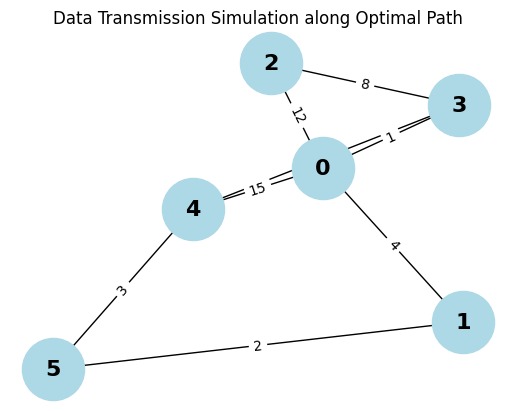

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the graph
G = nx.Graph()

# Add edges with weights (node1, node2, weight)
edges = [(0, 1, 4), (1, 5, 2), (5, 4, 3), (4, 3, 7), (3, 2, 8), (0, 4, 15), (0, 2, 12), (3, 0, 1)]
G.add_weighted_edges_from(edges)

# Define the optimal path found by the model
optimal_path = [3, 4, 5, 1, 0]

# Position the nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Create figure and axis
fig, ax = plt.subplots()

# Draw the entire graph initially
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold', ax=ax)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

# This function will be called repeatedly to update the plot
def update(frame):
    ax.clear()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold', ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
    
    # Highlight the current node and the "data packet" moving along the path
    if frame > 0:
        current_node = optimal_path[frame - 1]
        next_node = optimal_path[frame]
        nx.draw_networkx_edges(G, pos, edgelist=[(current_node, next_node)], width=8, alpha=0.7, edge_color='red', ax=ax)
        ax.plot([pos[current_node][0], pos[next_node][0]], [pos[current_node][1], pos[next_node][1]], 'ro-', markersize=10)
        nx.draw_networkx_nodes(G, pos, nodelist=[next_node], node_color='orange', node_size=2000, ax=ax)

# Create the animation object and assign it to a global variable to prevent it from being garbage-collected
ani = animation.FuncAnimation(fig, update, frames=len(optimal_path), interval=1000, repeat=False)

# Display the animation
plt.title("Data Transmission Simulation along Optimal Path")
plt.show()


In [7]:
pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   -------- ------------------------------- 3.7/17.3 MB 21.7 MB/s eta 0:00:01
   ---------- ----------------------------- 4.7/17.3 MB 13.0 MB/s eta 0:00:01
   ------------------ --------------------- 7.9/17.3 MB 11.6 MB/s eta 0:00:01
   ------------------------ --------------- 10.5/17.3 MB 12.8 MB/s eta 0:00:01
   ----------------------------- ---------- 12.8/17.3 MB 11.7 MB/s eta 0:00:01
   ------------------------------------ --- 16.0/17.3 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 17.3/17.3 MB 11.5 MB/s eta 0:00:00


In [9]:
import networkx as nx
import plotly.graph_objects as go

# Define the graph
G = nx.Graph()
edges = [(0, 1, 4), (1, 5, 2), (5, 4, 3), (4, 3, 7), (3, 2, 8), (0, 4, 15), (0, 2, 12), (3, 0, 1)]
G.add_weighted_edges_from(edges)

# Define the optimal path
optimal_path = [3, 4, 5, 1, 0]

# Create Plotly figure
fig = go.Figure()

# Add edges to the figure
for (u, v, d) in G.edges(data=True):
    fig.add_trace(go.Scatter(x=[pos[u][0], pos[v][0]], y=[pos[u][1], pos[v][1]], 
                             mode='lines+text', line=dict(width=2, color='black')))

# Add nodes
for node in G.nodes():
    fig.add_trace(go.Scatter(x=[pos[node][0]], y=[pos[node][1]], mode='markers+text', 
                             marker=dict(size=10, color='lightblue'), text=[node]))

# Animate the path
for i in range(len(optimal_path)-1):
    u, v = optimal_path[i], optimal_path[i+1]
    fig.add_trace(go.Scatter(x=[pos[u][0], pos[v][0]], y=[pos[u][1], pos[v][1]], 
                             mode='lines+markers', line=dict(color='red', width=4)))

fig.update_layout(title="Data Transmission Simulation along Optimal Path")
fig.show()


In [10]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# Define the graph
G = nx.Graph()
edges = [(0, 1, 4), (1, 5, 2), (5, 4, 3), (4, 3, 7), (3, 2, 8), (0, 4, 15), (0, 2, 12), (3, 0, 1)]
G.add_weighted_edges_from(edges)

# Define the optimal path
optimal_path = [3, 4, 5, 1, 0]

# Position the nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Create Plotly figure
fig = go.Figure()

# Add edges with weights to the figure
for u, v, d in G.edges(data=True):
    fig.add_trace(go.Scatter(x=[pos[u][0], pos[v][0]], y=[pos[u][1], pos[v][1]], 
                             mode='lines', line=dict(width=2, color='black'),
                             showlegend=False))
    mid_x = (pos[u][0] + pos[v][0]) / 2
    mid_y = (pos[u][1] + pos[v][1]) / 2
    fig.add_trace(go.Scatter(x=[mid_x], y=[mid_y], mode='text', text=[f"{d['weight']}"], 
                             textposition='bottom center', showlegend=False))

# Add nodes
fig.add_trace(go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers+text',
    marker=dict(size=10, color='lightblue'),
    text=[str(node) for node in G.nodes()],
    textposition='top center',
    showlegend=False
))

# Create animation frames
frames = []
for i in range(len(optimal_path) - 1):
    u, v = optimal_path[i], optimal_path[i + 1]
    frames.append(go.Frame(
        data=[
            go.Scatter(x=[pos[u][0], pos[v][0]], y=[pos[u][1], pos[v][1]],
                       mode='lines+markers', line=dict(color='red', width=4),
                       marker=dict(size=12, color='red'),
                       showlegend=False),
            go.Scatter(x=[pos[u][0]], y=[pos[u][1]], mode='markers', 
                       marker=dict(size=15, color='orange'),
                       showlegend=False),
            go.Scatter(x=[pos[v][0]], y=[pos[v][1]], mode='markers', 
                       marker=dict(size=15, color='orange'),
                       showlegend=False)
        ],
        name=f"Step {i + 1}"
    ))

# Add frames to the figure
fig.frames = frames

# Add play and pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {
                    'frame': {'duration': 1000, 'redraw': True},
                    'fromcurrent': True
                }]
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': True},
                    'mode': 'immediate',
                    'transition': {'duration': 0}
                }]
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Update layout for better visualization
fig.update_layout(
    title="Data Transmission Simulation along Optimal Path",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    showlegend=False
)

# Show the plot
fig.show()


In [12]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# Define the graph
G = nx.Graph()
edges = [(0, 1, 4), (1, 5, 2), (5, 4, 3), (4, 3, 7), (3, 2, 8), (0, 4, 15), (0, 2, 12), (3, 0, 1)]
G.add_weighted_edges_from(edges)

# Define the optimal path
optimal_path = [3, 4, 5, 1, 0]

# Position the nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Create Plotly figure
fig = go.Figure()

# Add edges with weights to the figure
for u, v, d in G.edges(data=True):
    fig.add_trace(go.Scatter(x=[pos[u][0], pos[v][0]], y=[pos[u][1], pos[v][1]], 
                             mode='lines', line=dict(width=2, color='black'),
                             showlegend=False))
    mid_x = (pos[u][0] + pos[v][0]) / 2
    mid_y = (pos[u][1] + pos[v][1]) / 2
    fig.add_trace(go.Scatter(x=[mid_x], y=[mid_y], mode='text', text=[f"{d['weight']}"], 
                             textposition='bottom center', showlegend=False))

# Add nodes
fig.add_trace(go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers+text',
    marker=dict(size=10, color='lightblue'),
    text=[str(node) for node in G.nodes()],
    textposition='top center',
    showlegend=False
))

# Create animation frames
frames = []
for i in range(len(optimal_path)):
    current_node = optimal_path[i]
    
    # Highlight current node with multiple dots
    frames.append(go.Frame(
        data=[
            go.Scatter(x=[pos[current_node][0]] * 10, y=[pos[current_node][1]] * 10,
                       mode='markers', marker=dict(size=12, color='orange', opacity=0.5),
                       showlegend=False)
        ],
        name=f"Step {i + 1}"
    ))

    # Add a few dots for each frame to create a "movement" effect
    for j in range(1, 10):
        x_offset = np.random.uniform(-0.02, 0.02)
        y_offset = np.random.uniform(-0.02, 0.02)
        frames.append(go.Frame(
            data=[
                go.Scatter(x=[pos[current_node][0] + x_offset] * 10, 
                           y=[pos[current_node][1] + y_offset] * 10,
                           mode='markers', marker=dict(size=12, color='orange', opacity=0.5),
                           showlegend=False)
            ],
            name=f"Step {i + 1}_Dot_{j}"
        ))

# Add frames to the figure
fig.frames = frames

# Add play and pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {
                    'frame': {'duration': 5000, 'redraw': True},
                    'fromcurrent': True
                }]
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': True},
                    'mode': 'immediate',
                    'transition': {'duration': 0}
                }]
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Update layout for better visualization
fig.update_layout(
    title="Data Transmission Simulation along Optimal Path",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    showlegend=False
)

# Show the plot
fig.show()


In [13]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# Define the graph
G = nx.Graph()
edges = [(0, 1, 4), (1, 5, 2), (5, 4, 3), (4, 3, 7), (3, 2, 8), (0, 4, 15), (0, 2, 12), (3, 0, 1)]
G.add_weighted_edges_from(edges)

# Define the optimal path
optimal_path = [3, 4, 5, 1, 0]

# Position the nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Create Plotly figure
fig = go.Figure()

# Add edges with weights to the figure
for u, v, d in G.edges(data=True):
    fig.add_trace(go.Scatter(x=[pos[u][0], pos[v][0]], y=[pos[u][1], pos[v][1]], 
                             mode='lines', line=dict(width=2, color='black'),
                             showlegend=False))
    mid_x = (pos[u][0] + pos[v][0]) / 2
    mid_y = (pos[u][1] + pos[v][1]) / 2
    fig.add_trace(go.Scatter(x=[mid_x], y=[mid_y], mode='text', text=[f"{d['weight']}"], 
                             textposition='bottom center', showlegend=False))

# Add nodes
fig.add_trace(go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers+text',
    marker=dict(size=10, color='lightblue'),
    text=[str(node) for node in G.nodes()],
    textposition='top center',
    showlegend=False
))

# Create animation frames
frames = []
for i in range(len(optimal_path) - 1):
    u, v = optimal_path[i], optimal_path[i + 1]
    x_values = np.linspace(pos[u][0], pos[v][0], num=10)
    y_values = np.linspace(pos[u][1], pos[v][1], num=10)
    
    for j in range(len(x_values)):
        frames.append(go.Frame(
            data=[
                go.Scatter(x=[x_values[j]], y=[y_values[j]], 
                           mode='markers', marker=dict(size=12, color='red'),
                           showlegend=False)
            ],
            name=f"Step {i + 1}_Dot_{j}"
        ))

# Add frames to the figure
fig.frames = frames

# Add play and pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {
                    'frame': {'duration': 200, 'redraw': True},
                    'fromcurrent': True
                }]
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': True},
                    'mode': 'immediate',
                    'transition': {'duration': 0}
                }]
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Update layout for better visualization
fig.update_layout(
    title="Data Transmission Simulation along Optimal Path",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    showlegend=False
)

# Show the plot
fig.show()


In [14]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# Define the graph
G = nx.Graph()
edges = [(0, 1, 4), (1, 5, 2), (5, 4, 3), (4, 3, 7), (3, 2, 8), (0, 4, 15), (0, 2, 12), (3, 0, 1)]
G.add_weighted_edges_from(edges)

# Define the optimal path
optimal_path = [3, 4, 5, 1, 0]

# Position the nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Create Plotly figure
fig = go.Figure()

# Add edges with weights to the figure
for u, v, d in G.edges(data=True):
    fig.add_trace(go.Scatter(x=[pos[u][0], pos[v][0]], y=[pos[u][1], pos[v][1]], 
                             mode='lines', line=dict(width=2, color='black'),
                             showlegend=False))
    mid_x = (pos[u][0] + pos[v][0]) / 2
    mid_y = (pos[u][1] + pos[v][1]) / 2
    fig.add_trace(go.Scatter(x=[mid_x], y=[mid_y], mode='text', text=[f"{d['weight']}"], 
                             textposition='bottom center', showlegend=False))

# Add nodes
fig.add_trace(go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers+text',
    marker=dict(size=10, color='lightblue'),
    text=[str(node) for node in G.nodes()],
    textposition='top center',
    showlegend=False
))

# Create animation frames
frames = []
num_dots = 15  # Number of dots in the trail
duration_per_segment = 200  # Duration per frame in milliseconds

for i in range(len(optimal_path) - 1):
    u, v = optimal_path[i], optimal_path[i + 1]
    
    # Generate coordinates along the path
    x_values = np.linspace(pos[u][0], pos[v][0], num=num_dots)
    y_values = np.linspace(pos[u][1], pos[v][1], num=num_dots)
    
    # Create frames for the moving dots
    for j in range(num_dots):
        # Generate dot positions
        x_pos = x_values[max(0, j - num_dots + 1):j + 1]
        y_pos = y_values[max(0, j - num_dots + 1):j + 1]
        
        frames.append(go.Frame(
            data=[
                go.Scatter(x=x_pos, y=y_pos, 
                           mode='markers', 
                           marker=dict(size=10, color='red'),
                           showlegend=False)
            ],
            name=f"Step {i + 1}_Frame_{j}"
        ))

# Add frames to the figure
fig.frames = frames

# Add play and pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {
                    'frame': {'duration': duration_per_segment, 'redraw': True},
                    'fromcurrent': True
                }]
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': True},
                    'mode': 'immediate',
                    'transition': {'duration': 0}
                }]
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Update layout for better visualization
fig.update_layout(
    title="Data Transmission Simulation along Optimal Path",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    showlegend=False
)

# Show the plot
fig.show()


In [15]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# Define the graph
G = nx.Graph()
edges = [(0, 1, 4), (1, 5, 2), (5, 4, 3), (4, 3, 7), (3, 2, 8), (0, 4, 15), (0, 2, 12), (3, 0, 1)]
G.add_weighted_edges_from(edges)

# Define the optimal path
optimal_path = [3, 4, 5, 1, 0]

# Position the nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Create Plotly figure
fig = go.Figure()

# Add edges with weights to the figure
for u, v, d in G.edges(data=True):
    fig.add_trace(go.Scatter(x=[pos[u][0], pos[v][0]], y=[pos[u][1], pos[v][1]], 
                             mode='lines', line=dict(width=2, color='black'),
                             showlegend=False))
    mid_x = (pos[u][0] + pos[v][0]) / 2
    mid_y = (pos[u][1] + pos[v][1]) / 2
    fig.add_trace(go.Scatter(x=[mid_x], y=[mid_y], mode='text', text=[f"{d['weight']}"], 
                             textposition='bottom center', showlegend=False))

# Add nodes
fig.add_trace(go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers+text',
    marker=dict(size=10, color='lightblue'),
    text=[str(node) for node in G.nodes()],
    textposition='top center',
    showlegend=False
))

# Create animation frames
frames = []
num_dots = 20  # Number of dots to simulate movement
for i in range(len(optimal_path) - 1):
    u, v = optimal_path[i], optimal_path[i + 1]
    x_values = np.linspace(pos[u][0], pos[v][0], num=num_dots)
    y_values = np.linspace(pos[u][1], pos[v][1], num=num_dots)
    
    for j in range(num_dots):
        frames.append(go.Frame(
            data=[
                go.Scatter(x=x_values[:j+1], y=y_values[:j+1], 
                           mode='markers', marker=dict(size=12, color='red'),
                           showlegend=False)
            ],
            name=f"Step {i + 1}_Dot_{j}"
        ))

# Add frames to the figure
fig.frames = frames

# Add play and pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {
                    'frame': {'duration': 100, 'redraw': True},
                    'fromcurrent': True
                }]
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': True},
                    'mode': 'immediate',
                    'transition': {'duration': 0}
                }]
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Update layout for better visualization
fig.update_layout(
    title="Data Transmission Simulation along Optimal Path",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    showlegend=False
)

# Show the plot
fig.show()


In [17]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# Define the graph
G = nx.Graph()
edges = [(0, 1, 4), (1, 5, 2), (5, 4, 3), (4, 3, 7), (3, 2, 8), (0, 4, 15), (0, 2, 12), (3, 0, 1)]
G.add_weighted_edges_from(edges)

# Define the optimal path
optimal_path = [3, 4, 5, 1, 0]

# Position the nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Create Plotly figure
fig = go.Figure()

# Add edges with weights to the figure
for u, v, d in G.edges(data=True):
    fig.add_trace(go.Scatter(x=[pos[u][0], pos[v][0]], y=[pos[u][1], pos[v][1]], 
                             mode='lines', line=dict(width=2, color='black'),
                             showlegend=False))
    mid_x = (pos[u][0] + pos[v][0]) / 2
    mid_y = (pos[u][1] + pos[v][1]) / 2
    fig.add_trace(go.Scatter(x=[mid_x], y=[mid_y], mode='text', text=[f"{d['weight']}"], 
                             textposition='bottom center', showlegend=False))

# Add nodes
fig.add_trace(go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers+text',
    marker=dict(size=10, color='lightblue'),
    text=[str(node) for node in G.nodes()],
    textposition='top center',
    showlegend=False
))

# Create animation frames
frames = []
num_dots = 20  # Number of dots to simulate movement
duration_per_segment = 100  # Duration per frame in milliseconds

# Create frames for each path segment
for i in range(len(optimal_path) - 1):
    u, v = optimal_path[i], optimal_path[i + 1]
    x_values = np.linspace(pos[u][0], pos[v][0], num=num_dots)
    y_values = np.linspace(pos[u][1], pos[v][1], num=num_dots)
    
    for j in range(num_dots):
        frames.append(go.Frame(
            data=[
                go.Scatter(x=x_values[:j+1], y=y_values[:j+1], 
                           mode='markers', marker=dict(size=12, color='red'),
                           showlegend=False),
                # Retain previous dots
                go.Scatter(x=x_values[j:], y=y_values[j:], 
                           mode='markers', marker=dict(size=12, color='red'),
                           showlegend=False)
            ],
            name=f"Step {i + 1}_Frame_{j}"
        ))

# Add frames to the figure
fig.frames = frames

# Add play and pause buttons
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {
                    'frame': {'duration': duration_per_segment, 'redraw': True},
                    'fromcurrent': True
                }]
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': True},
                    'mode': 'immediate',
                    'transition': {'duration': 0}
                }]
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Update layout for better visualization
fig.update_layout(
    title="Data Transmission Simulation along Optimal Path",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    showlegend=False
)

# Show the plot
fig.show()
